In [1]:
%matplotlib inline
import matplotlib
backend = matplotlib.get_backend()
import matplotlib.pyplot as plt

from pathlib import Path
import numpy as np

import os
# This line will supress the TF output 
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
import tensorflow as tf

# midap import and reset of backend to notebook
from midap.data.tf_pipeline import TFPipe
matplotlib.use(backend)

In [2]:
# you can use a globstar expression to get your eval files, e.g. this load all images of the PH channel
eval_files = sorted(Path("../../../TrainingData").glob("**/PH/**/*raw.tif"))

# load the data (add more keyword arguments for customization)
tf_pipe = TFPipe(eval_files, np_random_seed=11)

23-02-21 08:38:30 preprocessing.py INF   Setting numpy random seed to: 11 
23-02-21 08:38:30 preprocessing.py INF   Loading file ../../../TrainingData/Escherichia-coli/MG1655/PH/normal/GD_img_1_raw.tif 
23-02-21 08:38:30 preprocessing.py INF   Splitting into 4x4 grid... 
23-02-21 08:38:30 preprocessing.py INF   Splitting into train and test... 
23-02-21 08:38:30 preprocessing.py INF   Loading file ../../../TrainingData/Escherichia-coli/MG1655/PH/normal/GD_img_2_raw.tif 
23-02-21 08:38:31 preprocessing.py INF   Splitting into 4x4 grid... 
23-02-21 08:38:31 preprocessing.py INF   Splitting into train and test... 
23-02-21 08:38:31 preprocessing.py INF   Loading file ../../../TrainingData/Escherichia-coli/MG1655/PH/normal/GD_img_3_raw.tif 
23-02-21 08:38:31 preprocessing.py INF   Splitting into 4x4 grid... 
23-02-21 08:38:31 preprocessing.py INF   Splitting into train and test... 
23-02-21 08:38:31 preprocessing.py INF   Loading file ../../../TrainingData/MultiBacteria/Escherichia-coli-MG

In [3]:
# readout the data
np_dset = list(tf_pipe.dset_test.unbatch().as_numpy_iterator())

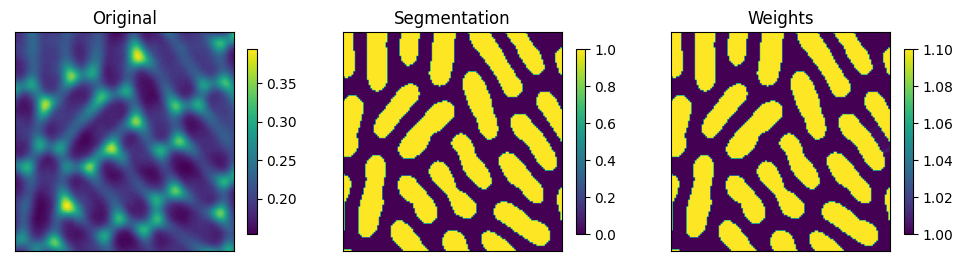

In [4]:
# visualize X_train and y_train
n = 0

fig, axes = plt.subplots(1,3)
fig.set_size_inches((12,8))

# get the sample
x_test, w_test, y_test = np_dset[n][0]

# Original image
im0 = axes[0].imshow(x_test[...,0])
axes[0].set_title("Original")
axes[0].set_xticks([])
axes[0].set_yticks([])
cbar = fig.colorbar(im0, ax=axes[0], shrink=0.3)


# Segmentation
im1 = axes[1].imshow(y_test[...,0])
axes[1].set_title("Segmentation")
axes[1].set_xticks([])
axes[1].set_yticks([])
cbar = fig.colorbar(im1, ax=axes[1], shrink=0.3)

im2 = axes[2].imshow(w_test[...,0])
axes[2].set_title("Weights")
axes[2].set_xticks([])
axes[2].set_yticks([])
cbar = fig.colorbar(im2, ax=axes[2], shrink=0.3)